In [1]:
# importing all the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoCV, Ridge,RidgeCV, ElasticNet,ElasticNetCV,Lasso
import pickle
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Load the dataset
df = pd.read_csv("/Users/malhardhopate/Desktop/IUB/Fall 2023/Applied Machine Learning/wine+quality/winequality-red.csv",sep=";",encoding="UTF-8")

#showing first 5 rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<H1>A] Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical? </H1>

In [4]:
# summarize data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
print(df.describe())
print("*"*100)
print(df.shape)
print("*"*100)


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

 <H3>Ans - A</H3>
 <H3>
    - There are a total of 1599 rows & 12 attributes  present none of the rows contains "N/A" or "NULL" values <br>
    - There are no Categorical Attributes <br>
    - Except 'quality' attribute, all other attributes are float type attributes, and 'quality' is an int type attribute </H3>

<H1>B] Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?</H1>

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

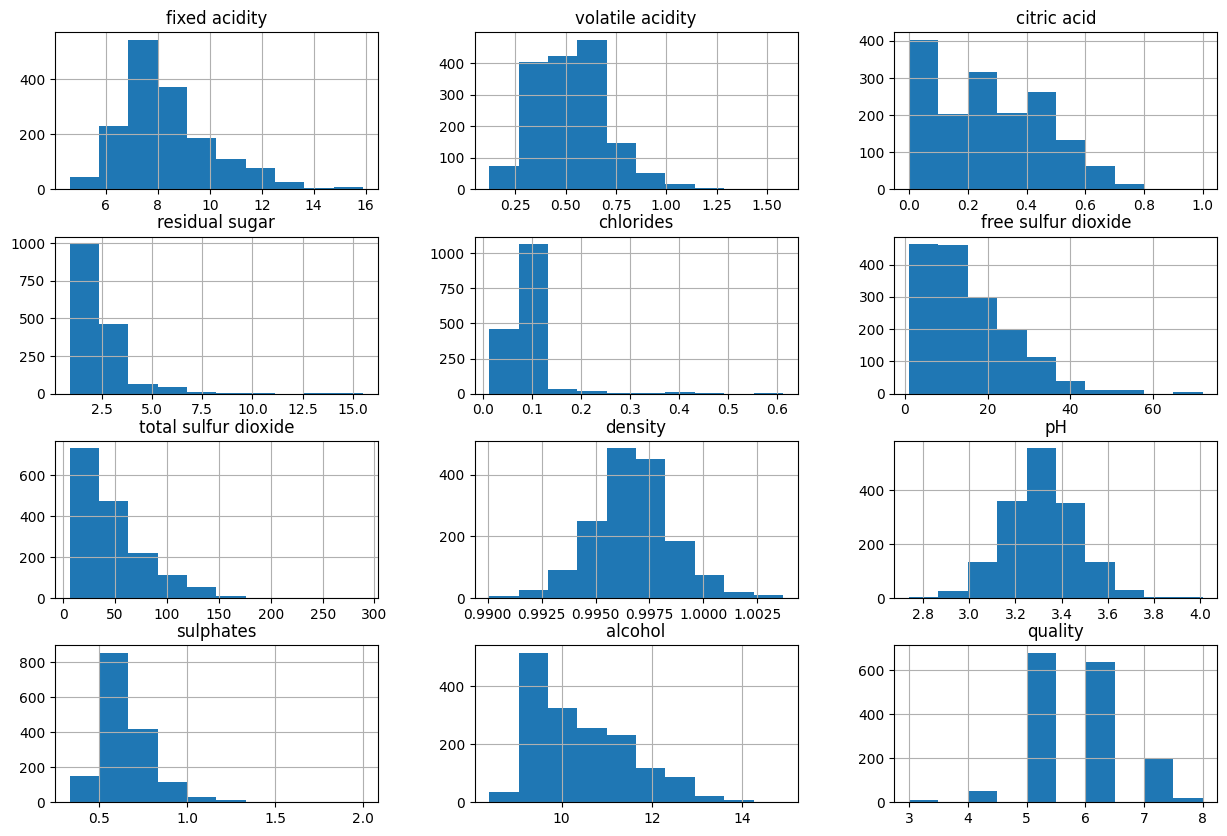

In [7]:
# plotting histogram
%matplotlib inline

df.hist(figsize=(15,10))

In [10]:
df.info()
print("*"*100)
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
****************************************************************************************************


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<H1>Ans - B</H1>
<H3>
- There are no NA or null values in the dataset <br>
- Since there are no NAs or Null values present, there are no attributes that require any special treatment </H3>

<H1>C] Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.</H1>

In [11]:
#Conducting Pearson Correlation
df.corr(method="pearson")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


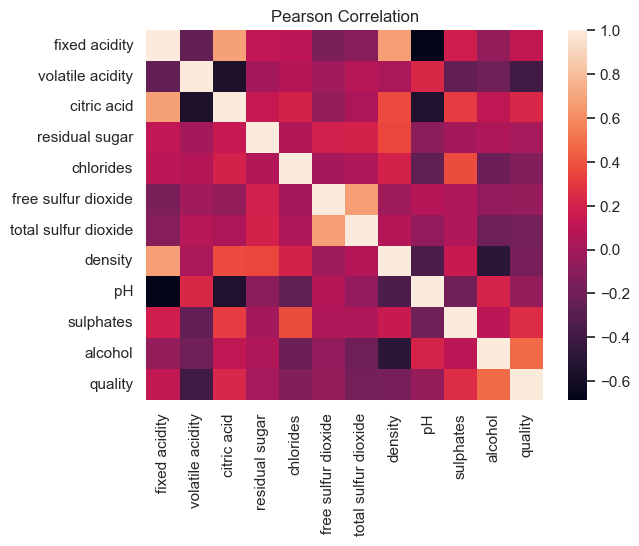

In [12]:
import seaborn as sns

#Making a Heatmap to determine Correlation
sns.set_theme(style="white")
ax = sns.heatmap(df.corr()).set_title("Pearson Correlation")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


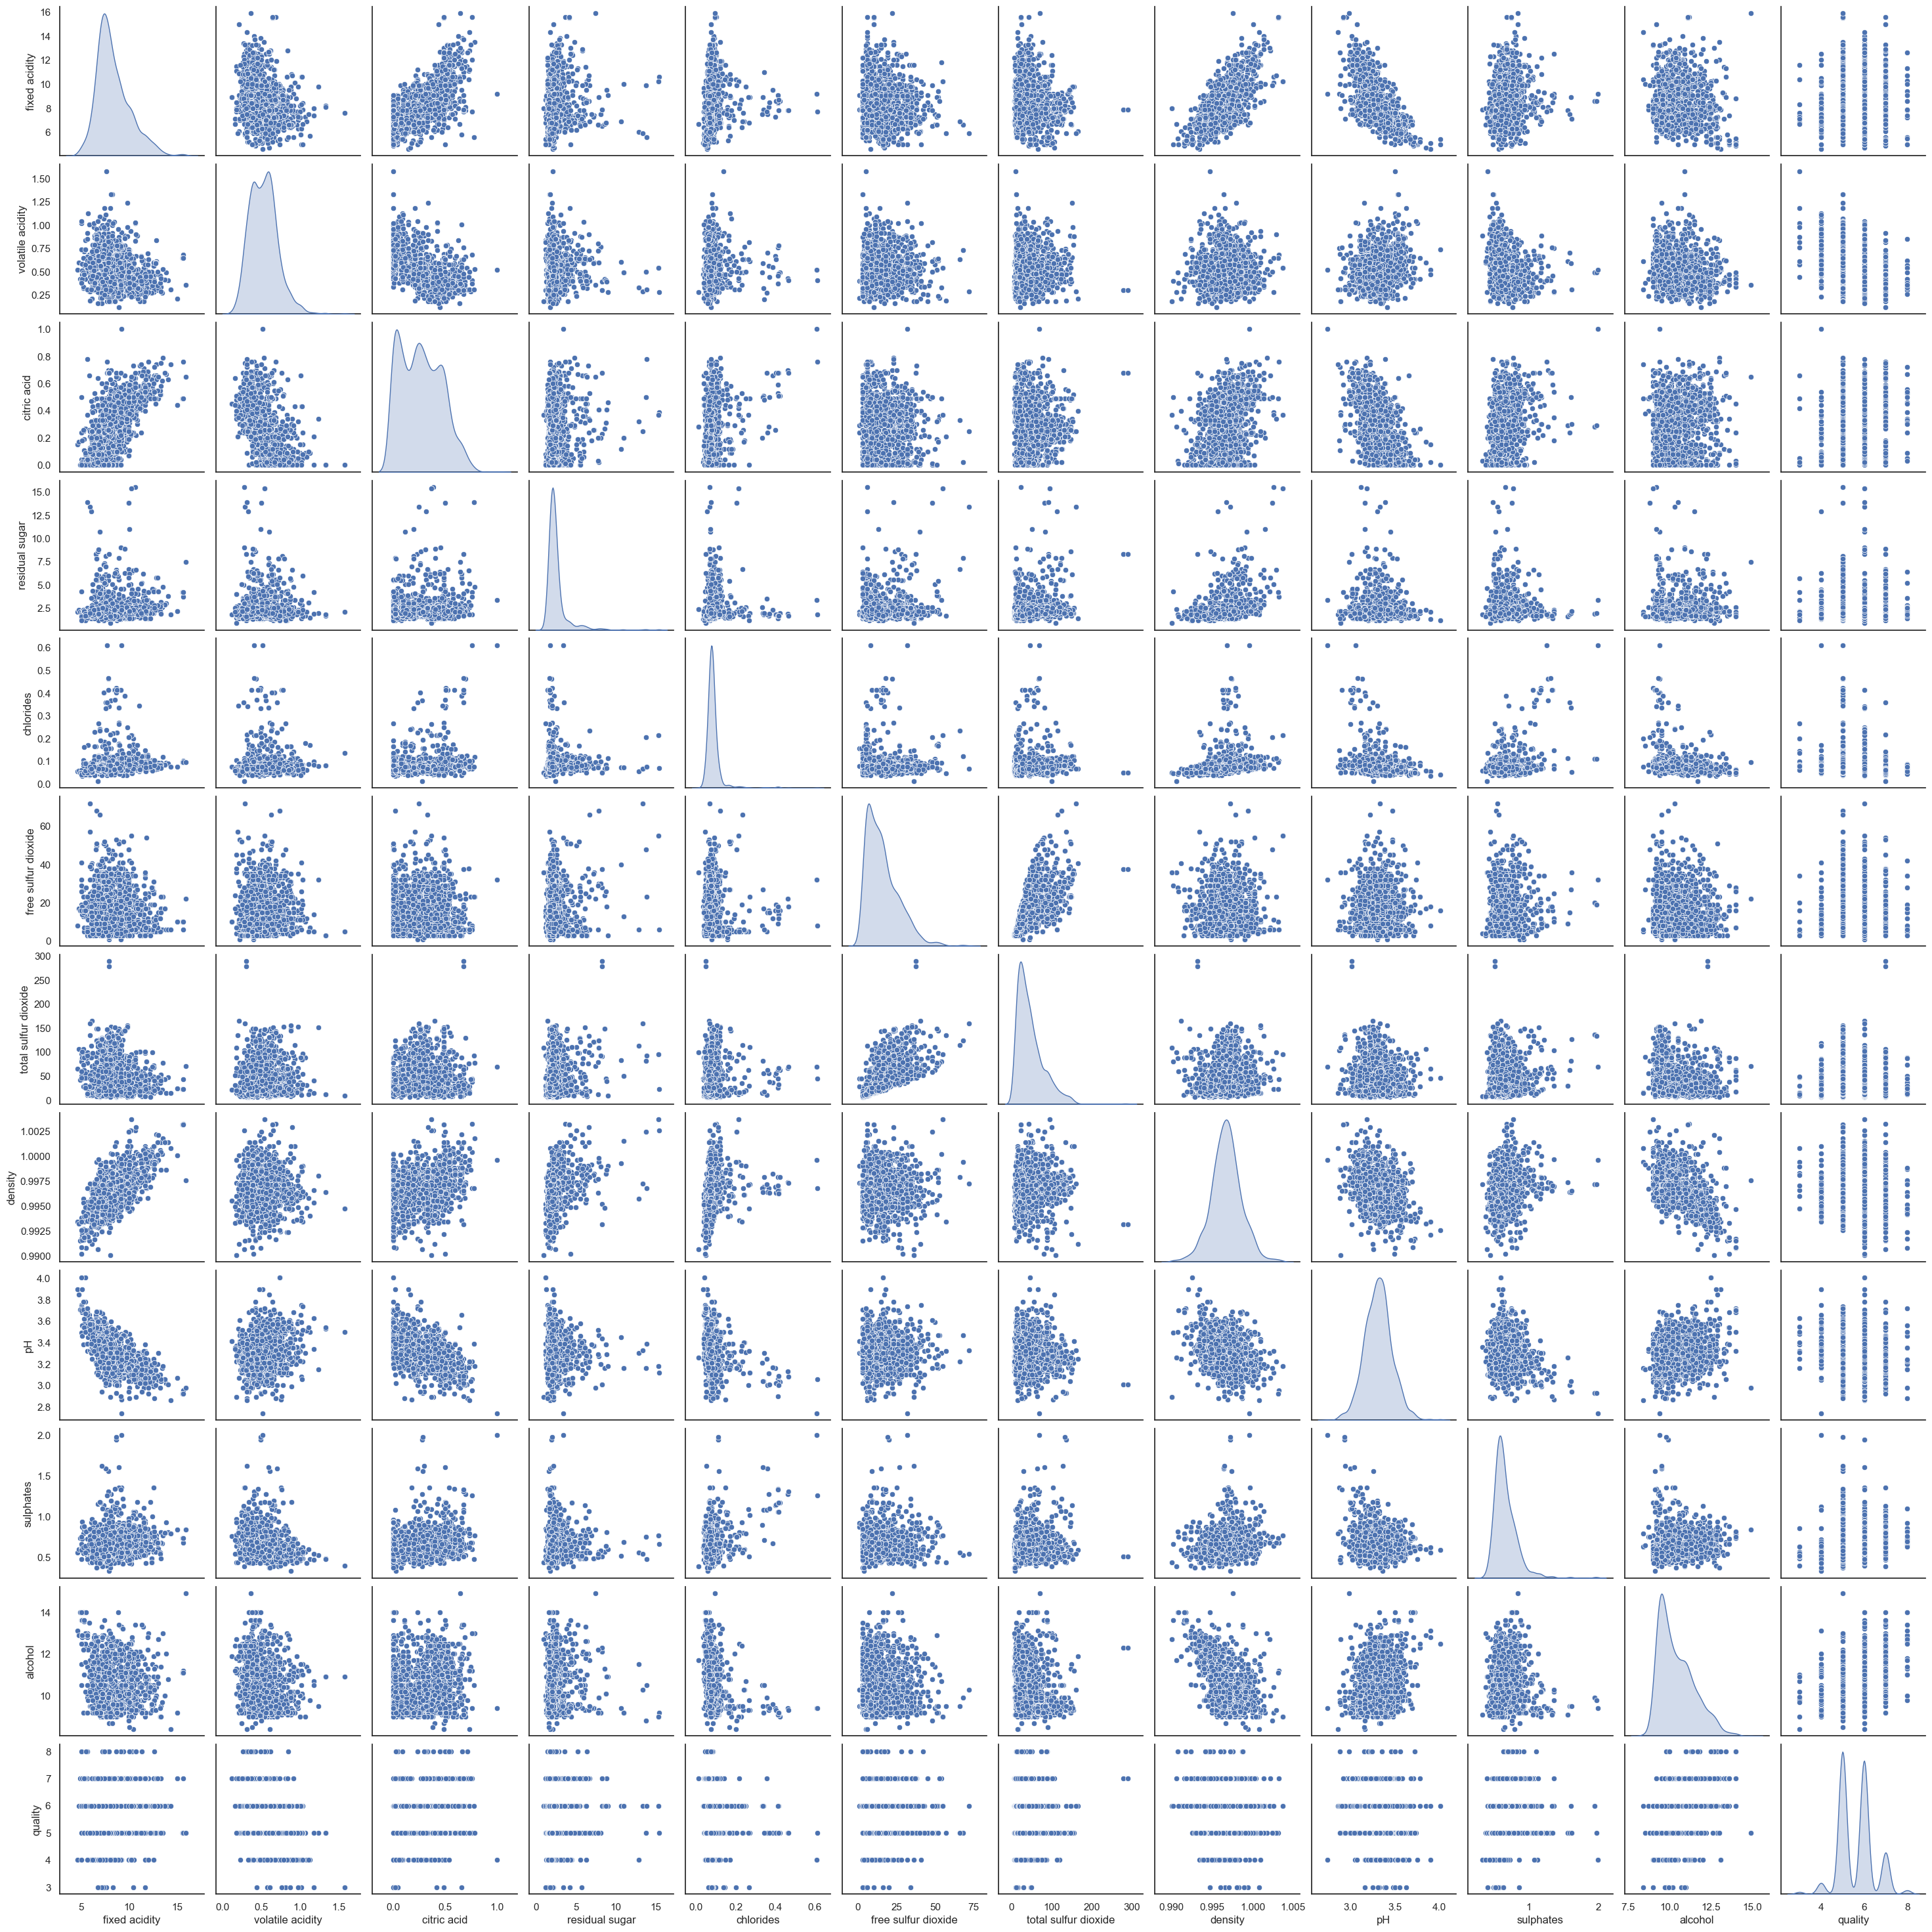

In [13]:
#Plotting Scatter Plots
sns.pairplot(df, diag_kind="kde")

<H1> Ans - C</H1>
<H3>From the plotted scatter plot we can see that Life Ladder has high co-relation with [Log GDP per capita], [Social support], [Healthy life expectancy at birth] 
and all these logically make sense as these are the important factors that contribute to prosperity of nation and thus happiness.</H3>

<H1>D] Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.</H1>

In [15]:
df.corr(method="pearson")['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [17]:
#X = df.drop(columns=['Life Ladder'])
#Y = df['Life Ladder']
#Selecting only the columns that have correlation > 0.5
X = df.drop(columns=['quality'])
Y = df['quality']
# Dividing data into train and test (20% data for test)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=100)

print(X.head())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


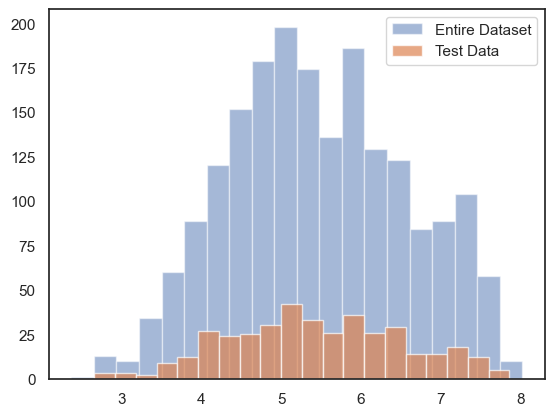

<Figure size 640x480 with 0 Axes>

In [19]:
#Testing if the testing data represents the entire dataset

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Visualize the distribution of Y - the key feature in the entire dataset
plt.hist(Y, bins=20, alpha=0.5, label='Entire Dataset')

# Visualize the distribution of the same feature ('Life Ladder') in the test set
plt.hist(y_test, bins=20, alpha = 0.7, label='Test Data')

plt.legend()
figure(figsize=(8, 6), dpi=80)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

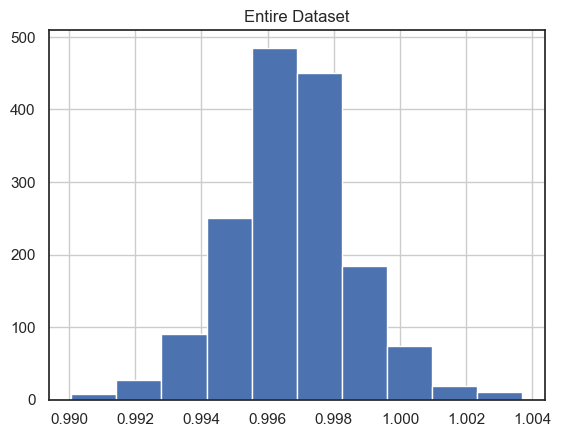

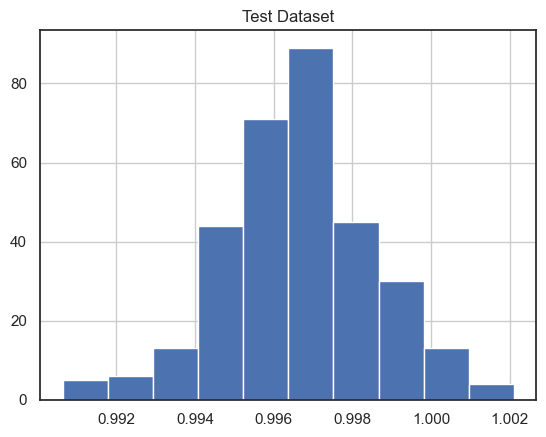

In [18]:
X.hist(column='density')
plt.title("Entire Dataset")
plt.show

x_test.hist(column='density')
plt.title("Test Dataset")
plt.show

<H1>Ans - D</H1>
<H3>Through the graphs we can see that the Test Data is reporesentative of the entire Dataset, as everybin in the Test Data corresponds to a bin in the entire dataset.</H3>

<H1>E] Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.</H1>

In [19]:
# evaluate a logistic regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# create model
model = LinearRegression()
mymodel = model.fit(x_train,y_train)

# The intercept
print("Intercept: \n", mymodel.intercept_)

# The coefficients
print("Coefficients: \n", mymodel.coef_)

# Make prediction 
y_train_predicted = mymodel.predict(x_train)


print("\nTraining: Mean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted))

# Explained variance score: 1 is perfect prediction
print("Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % r2_score(y_train, y_train_predicted))

# Explained variance score: 1 is perfect prediction
print("Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" 
      % mymodel.score(x_train, y_train))


Intercept: 
 25.625524207911493
Coefficients: 
 [ 1.97477990e-02 -1.03528779e+00 -9.88178613e-02  2.73977976e-02
 -1.69985389e+00  3.69270762e-03 -3.51756244e-03 -2.16705602e+01
 -3.95782604e-01  8.76090816e-01  2.83676202e-01]

Training: Mean squared error: 0.42
Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.37
Training: Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.37


In [20]:
#K-fold CV
from sklearn.model_selection import cross_val_score
#4-fold cv 
#evaluation metric r2
scores = cross_val_score(mymodel, x_train, y_train, scoring='r2', cv=4)
scores
print('R2: %.3f' % np.mean(scores))
#evaluation metric accuracy
scores1 = cross_val_score(mymodel, x_train, y_train, scoring='neg_mean_squared_error', cv=4)
scores1
print('MSE: %.3f' % np.mean(scores1))

R2: 0.341
MSE: -0.427


In [22]:
X.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [23]:
# Closed Form solution using normal equation

x_closedForm = np.array(X)
y_closedForm = np.array(Y)
x_p = np.c_[np.ones((len(x_closedForm),1)),x_closedForm]

theta = np.linalg.inv(x_p.T.dot(x_p)).dot(x_p.T).dot(y_closedForm)
theta
x_test_1 = np.array([1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.52,0.56,9.4])
#x_test_1 = np.array(x_test.head(1))
#x_test_p = np.c_[np.ones((len(x_test_1),1)),x_test_1]
print(theta)
y_predict = x_test_1.dot(theta)
y_predict


[ 2.19652084e+01  2.49905527e-02 -1.08359026e+00 -1.82563948e-01
  1.63312698e-02 -1.87422516e+00  4.36133331e-03 -3.26457970e-03
 -1.78811638e+01 -4.13653144e-01  9.16334413e-01  2.76197699e-01]


5.0287139232129965

In [24]:
# Regresion using SGD

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# We will use ShuffleSplit as a cross validation strategy
shuffle_split_cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)

#Divide the training data into train & dev
train_features,dev_features,train_labels,dev_labels = train_test_split(x_train,y_train,random_state=42)

sgd = SGDRegressor(random_state=42)
sgd.fit(train_features,train_labels)

train_mae = mean_absolute_error(train_labels,sgd.predict(train_features))
dev_mae = mean_absolute_error(dev_labels,sgd.predict(dev_features))
print("Mean absolute error on Training set: ", train_mae)
print("Mean absolute error on development set: ",dev_mae)


Mean absolute error on Training set:  204098912218.15656
Mean absolute error on development set:  181648157947.9934


Text(0.5, 1.0, 'LEarning curve: eta0= 0.1000')

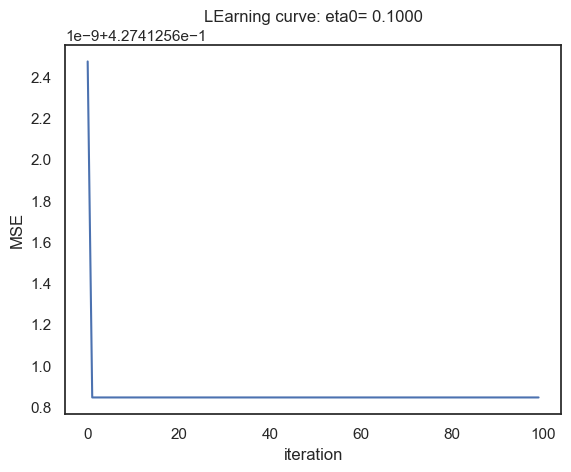

In [25]:
# Stepwise training of SGDRegressor

Eta0 =0.1
sgd_pipeline =Pipeline([("feature_scaling",StandardScaler()),("SGD",SGDRegressor(max_iter=500,tol=0,warm_start=True,eta0 = Eta0,random_state=42))])
loss=[]
for epoch in range(100):
    sgd_pipeline.fit(train_features,train_labels)
    loss.append(mean_squared_error(train_labels,sgd_pipeline.predict(train_features)))
plt.plot(np.arange(len(loss)),loss, 'b-')
plt.xlabel("iteration")
plt.ylabel("MSE")
plt.title(f'LEarning curve: eta0={Eta0: .4f}')

Text(0.5, 1.0, 'LEarning curve: eta0= 0.0100')

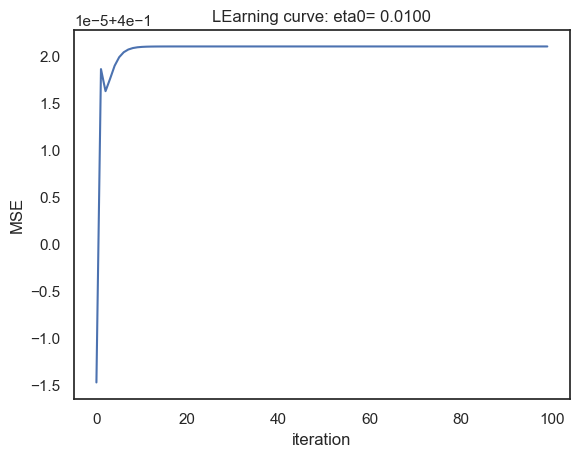

In [26]:
Eta0 =0.01
sgd_pipeline =Pipeline([("feature_scaling",StandardScaler()),("SGD",SGDRegressor(max_iter=500,tol=0,warm_start=True,eta0 = Eta0,random_state=42))])
loss=[]
for epoch in range(100):
    sgd_pipeline.fit(train_features,train_labels)
    loss.append(mean_squared_error(train_labels,sgd_pipeline.predict(train_features)))
plt.plot(np.arange(len(loss)),loss, 'b-')
plt.xlabel("iteration")
plt.ylabel("MSE")
plt.title(f'LEarning curve: eta0={Eta0: .4f}')



Text(0.5, 1.0, 'LEarning curve: eta0= 0.0010')

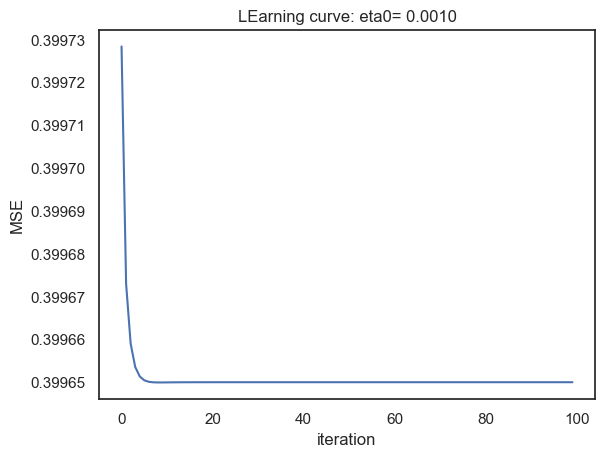

In [27]:
Eta0 =0.001
sgd_pipeline =Pipeline([("feature_scaling",StandardScaler()),("SGD",SGDRegressor(max_iter=500,tol=0,warm_start=True,eta0 = Eta0,random_state=42))])
loss=[]
for epoch in range(100):
    sgd_pipeline.fit(train_features,train_labels)
    loss.append(mean_squared_error(train_labels,sgd_pipeline.predict(train_features)))
plt.plot(np.arange(len(loss)),loss, 'b-')
plt.xlabel("iteration")
plt.ylabel("MSE")
plt.title(f'LEarning curve: eta0={Eta0: .4f}')


In [28]:
#Ridge Regression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(x_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(x_train, y_train)
test_score_ridge = ridgeReg.score(x_test, y_test)

print("\nRidge Model (alpha = 10)............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Ridge model for different penalty values
for i in cv:
    print(f"\nRidgeCV Model (alpha = {i})............................................\n")
    ridge_cv = RidgeCV(alphas = [i]).fit(x_train, y_train)
    #score
    print("The train score for ridge model is {}".format(ridge_cv.score(x_train, y_train)))
    print("The train score for ridge model is {}".format(ridge_cv.score(x_test, y_test)))


Ridge Model (alpha = 10)............................................

The train score for ridge model is 0.3587265386528996
The test score for ridge model is 0.29635570078860085

RidgeCV Model (alpha = 0.0001)............................................

The train score for ridge model is 0.36838130103768774
The train score for ridge model is 0.31762519526143596

RidgeCV Model (alpha = 0.001)............................................

The train score for ridge model is 0.3682513220440089
The train score for ridge model is 0.31777009232635645

RidgeCV Model (alpha = 0.01)............................................

The train score for ridge model is 0.3680362623156994
The train score for ridge model is 0.3177239527995498

RidgeCV Model (alpha = 0.1)............................................

The train score for ridge model is 0.3679716238706854
The train score for ridge model is 0.31729265650367255

RidgeCV Model (alpha = 1)............................................

The train s

In [29]:
#Lasso
lasso = Lasso(alpha = 10)
lasso.fit(x_train,y_train)
train_score_ls =lasso.score(x_train,y_train)
test_score_ls =lasso.score(x_test,y_test)

print("\nLasso Model (alpha = 10)............................................\n")
print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))

from sklearn.linear_model import LassoCV

#Lasso Cross validation
cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Lasso model for different penalty values
for i in cv:
    lasso_cv = LassoCV(alphas = [i], random_state=0).fit(x_train, y_train)
    print(f"\nLassoCV Model (alpha = {i})............................................\n")
    #score
    print("The train score for LassoCV model is: ",lasso_cv.score(x_train, y_train))
    print("The test score for LassoCV model is: ", lasso_cv.score(x_test, y_test))


Lasso Model (alpha = 10)............................................

The train score for ls model is 0.0
The test score for ls model is -7.38408864535689e-05

LassoCV Model (alpha = 0.0001)............................................

The train score for LassoCV model is:  0.7425457607609245
The test score for LassoCV model is:  0.7792541552733249

LassoCV Model (alpha = 0.001)............................................

The train score for LassoCV model is:  0.7424105699236156
The test score for LassoCV model is:  0.7785598077490157

LassoCV Model (alpha = 0.01)............................................

The train score for LassoCV model is:  0.7288664281376804
The test score for LassoCV model is:  0.7574616587538466

LassoCV Model (alpha = 0.1)............................................

The train score for LassoCV model is:  0.6206336508505883
The test score for LassoCV model is:  0.6324542934916957

LassoCV Model (alpha = 1)............................................

The tr

In [29]:
#Elastic Net
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha = 10)
model_enet.fit(x_train, y_train) 

train_score = model_enet.score(x_train,y_train)
test_score = model_enet.score(x_test,y_test)

print("\nElastic Net Model (alpha =10)............................................\n")
print("The train score for elastic net model is {}".format(train_score))
print("The test score for elastic net model is {}".format(test_score))

#Lasso Cross validation
cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Elastic Net model for different penalty values
for i in cv:
    model_enet = ElasticNet(alpha = i)
    model_enet.fit(x_train, y_train) 
    train_score = model_enet.score(x_train,y_train)
    test_score = model_enet.score(x_test,y_test)
    #score
    print(f"\nElastic Net Model (alpha ={i})............................................\n")
    print("The train score for elastic net model is {}".format(train_score))
    print("The test score for elastic net model is {}".format(test_score))



Elastic Net Model (alpha =10)............................................

The train score for elastic net model is 0.0020125473530417937
The test score for elastic net model is -0.0016006232807335152

Elastic Net Model (alpha =0.0001)............................................

The train score for elastic net model is 0.3679632254396712
The test score for elastic net model is 0.3171908611153669

Elastic Net Model (alpha =0.001)............................................

The train score for elastic net model is 0.3666600510396
The test score for elastic net model is 0.3118597242882788

Elastic Net Model (alpha =0.01)............................................

The train score for elastic net model is 0.35197714539026104
The test score for elastic net model is 0.2894712724448717

Elastic Net Model (alpha =0.1)............................................

The train score for elastic net model is 0.26321397162851357
The test score for elastic net model is 0.20878511950841083

Elastic

Mean Squared Error: 0.4170861216875429
Root mean Squared value is: 0.6458220511004118


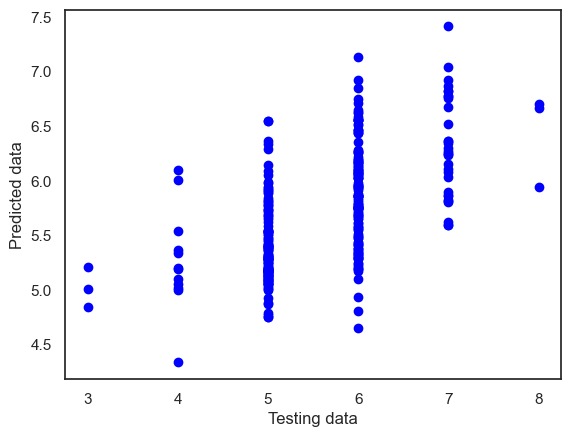

R2 Score: 0.3353209216134774


In [31]:
#Polynomial Regression
import math
df.head()

X = df.drop(columns=['quality'])
Y = df['quality']
# Dividing data into train and test (20% data for test)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=100)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 100)

# # Create a StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X.head()

# # Create polynomial features

poly = PolynomialFeatures(degree = 2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)

 

# # Initialize and train a linear regression model

model = LinearRegression()
model.fit(X_train_poly, y_train)

# # Make predictions on the test data

y_pred = model.predict(X_test_poly)

# # Calculate and print the Mean Squared Error (MSE)

mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root mean Squared value is: {math.sqrt(mse)}")

 

# # Plot the original data and the polynomial regression curve

#plt.scatter(y_test, y_pred, s=20, label='Data')

plt.scatter(y_test, y_pred, color = 'blue')
plt.xlabel('Testing data')
plt.ylabel('Predicted data')
plt.show()
# from sklearn.metrics import r2_score

 

# # Calculate the R2 score

r2 = r2_score(y_test, y_pred)

 

# # Print the R2 score

print(f"R2 Score: {r2}")


In [32]:
#Ridge for Polynomial
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train_poly,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train_poly, y_train)
test_score_ridge = ridgeReg.score(X_test_poly, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation

cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

#Fitting Ridge model for different penalty values

for i in cv:
    print(f"\nRidgeCV Model (alpha = {i})............................................\n")
    ridge_cv = RidgeCV(alphas = [i]).fit(X_train_poly, y_train)
    #score
    print("The train score for ridge model is {}".format(ridge_cv.score(X_train_poly, y_train)))
    print("The train score for ridge model is {}".format(ridge_cv.score(X_test_poly, y_test)))



Ridge Model............................................

The train score for ridge model is 0.7847296140780171
The test score for ridge model is 0.8004038333181265

RidgeCV Model (alpha = 0.0001)............................................

The train score for ridge model is 0.7847805454617047
The train score for ridge model is 0.8005120494637332

RidgeCV Model (alpha = 0.001)............................................

The train score for ridge model is 0.7847805454610747
The train score for ridge model is 0.8005120511478774

RidgeCV Model (alpha = 0.01)............................................

The train score for ridge model is 0.7847805453976902
The train score for ridge model is 0.8005120006364652

RidgeCV Model (alpha = 0.1)............................................

The train score for ridge model is 0.7847805390738383
The train score for ridge model is 0.8005114821987593

RidgeCV Model (alpha = 1)............................................

The train score for ridge mod

In [32]:
#Lasso for Polynomial
lasso = Lasso(alpha = 10)
lasso.fit(X_train_poly,y_train)
train_score_ls =lasso.score(X_train_poly,y_train)
test_score_ls =lasso.score(X_test_poly,y_test)

print("\nLasso Model............................................\n")
print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))

from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train_poly, y_train)

cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

for i in cv:
    print(f"\nLassoCV Model (alpha = {i})............................................\n")
    lasso_cv = LassoCV(alphas = [i]).fit(X_train_poly, y_train)
    #score
    print("The train score for lasso model is {}".format(lasso_cv.score(X_train_poly, y_train)))
    print("The train score for lasso model is {}".format(lasso_cv.score(X_test_poly, y_test)))




Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.0032321398792860556


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.0495020368334735, tolerance: 0.06724535679374356
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.33171065776053865, tolerance: 0.06889755620723367
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.463427345715218, tolerance: 0.06832688172042994
  model = cd_fast.enet


LassoCV Model (alpha = 0.0001)............................................



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.106733374715475, tolerance: 0.06724535679374356
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5969692921905789, tolerance: 0.06889755620723367
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.113229415371677, tolerance: 0.06832688172042994
  model = cd_fast.enet

The train score for lasso model is 0.4495391163667142
The train score for lasso model is 0.33636069494671217

LassoCV Model (alpha = 0.001)............................................

The train score for lasso model is 0.44625778600874466
The train score for lasso model is 0.342561149612604

LassoCV Model (alpha = 0.01)............................................

The train score for lasso model is 0.4210773935074895
The train score for lasso model is 0.34651005348308517

LassoCV Model (alpha = 0.1)............................................

The train score for lasso model is 0.3198715481917298
The train score for lasso model is 0.27896311141483465

LassoCV Model (alpha = 1)............................................

The train score for lasso model is 0.0
The train score for lasso model is -0.0032321398792860556

LassoCV Model (alpha = 10)............................................

The train score for lasso model is 0.0
The train score for lasso model is -0.0032321398792860556


In [33]:
#Elastic Net
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha = 10)
model_enet.fit(X_train_poly, y_train) 

train_score = model_enet.score(X_train_poly,y_train)
test_score = model_enet.score(X_test_poly,y_test)

print("\nElastic Net Model (alpha =10)............................................\n")
print("The train score for elastic net model is {}".format(train_score))
print("The test score for elastic net model is {}".format(test_score))

#Lasso Cross validation
cv = [0.0001, 0.001,0.01, 0.1, 1, 10]

for i in cv:
    print(f"\nElasticCV Model (alpha = {i})............................................\n")
    elastic_cv = ElasticNet(alpha = i).fit(X_train_poly, y_train)
    #score
    print("The train score for lasso model is {}".format(elastic_cv.score(X_train_poly, y_train)))
    print("The train score for lasso model is {}".format(elastic_cv.score(X_test_poly, y_test)))



Elastic Net Model (alpha =10)............................................

The train score for elastic net model is 0.0
The test score for elastic net model is -0.0032321398792860556

ElasticCV Model (alpha = 0.0001)............................................



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.238e+01, tolerance: 8.408e-02
  model = cd_fast.enet_coordinate_descent(


The train score for lasso model is 0.4495776941533829
The train score for lasso model is 0.3359294686183779

ElasticCV Model (alpha = 0.001)............................................

The train score for lasso model is 0.448206832289761
The train score for lasso model is 0.34040336360616663

ElasticCV Model (alpha = 0.01)............................................

The train score for lasso model is 0.43302441342075937
The train score for lasso model is 0.3485016820127842

ElasticCV Model (alpha = 0.1)............................................

The train score for lasso model is 0.3666472826644066
The train score for lasso model is 0.31634354392027864

ElasticCV Model (alpha = 1)............................................

The train score for lasso model is 0.0
The train score for lasso model is -0.0032321398792860556

ElasticCV Model (alpha = 10)............................................

The train score for lasso model is 0.0
The train score for lasso model is -0.003232139879

In [35]:
best_alpha = None
best_test_score = -float("inf")

for i in cv:
    print(f"\nElasticCV Model (alpha = {i})............................................\n")
    elastic_cv = ElasticNet(alpha=i).fit(X_train_poly, y_train)
    train_score = elastic_cv.score(X_train_poly, y_train)
    test_score = elastic_cv.score(X_test_poly, y_test)
    
    print("The train score for elastic net model is {}".format(train_score))
    print("The test score for elastic net model is {}".format(test_score))
    
    if test_score > best_test_score:
        best_test_score = test_score
        best_alpha = i

print(f"\nBest alpha: {best_alpha} with test score: {best_test_score}")


ElasticCV Model (alpha = 0.0001)............................................

The train score for elastic net model is 0.4495776941533829
The test score for elastic net model is 0.3359294686183779

ElasticCV Model (alpha = 0.001)............................................



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.238e+01, tolerance: 8.408e-02
  model = cd_fast.enet_coordinate_descent(


The train score for elastic net model is 0.448206832289761
The test score for elastic net model is 0.34040336360616663

ElasticCV Model (alpha = 0.01)............................................

The train score for elastic net model is 0.43302441342075937
The test score for elastic net model is 0.3485016820127842

ElasticCV Model (alpha = 0.1)............................................

The train score for elastic net model is 0.3666472826644066
The test score for elastic net model is 0.31634354392027864

ElasticCV Model (alpha = 1)............................................

The train score for elastic net model is 0.0
The test score for elastic net model is -0.0032321398792860556

ElasticCV Model (alpha = 10)............................................

The train score for elastic net model is 0.0
The test score for elastic net model is -0.0032321398792860556

Best alpha: 0.01 with test score: 0.3485016820127842
